In [1]:
import os
import nibabel as nib
from preprocess_nifti import *
from nilearn.maskers import NiftiLabelsMasker
from nilearn.datasets import fetch_atlas_aal
from nilearn.image import load_img
from preprocess_nifti import *
from nilearn.plotting import  view_img
import dicom2nifti
import pydicom


In [22]:
fdg_pet_dir = os.path.join('data', 'fdg_pet', 'ADNI', '003_S_4136', 'ADNI__AC___FDG', '2011-08-23_15_27_30.0', 'I257001')
output_dir = os.path.join('data', 'fdg_pet', '2011-08-23_15_27_30.0.nii')
# fdg_pet_dir = 'data/fdg_pet/ADNI/003_S_4136/ADNI__AC___FDG/2011-08-23_15_27_30.0/I257001'
dicom2nifti.convert_dir.convert_directory(fdg_pet_dir, output_dir)

C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\pydicom\valuerep.py:440: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.08562807802856949500'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
Traceback (most recent call last):
  File "C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\dicom2nifti\convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\dicom2nifti\convert_dicom.py", line 119, in dicom_array_to_nifti
    results = convert_generic.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\dicom2nifti\convert_generic.py", line 252, in dico

In [19]:
dicom_files = [pydicom.dcmread(os.path.join(fdg_pet_dir, f)) for f in os.listdir(fdg_pet_dir) if f.endswith('.dcm')]

slices = [dcm.pixel_array for dcm in dicom_files]
print(f'Found {len(slices)} slices in the DICOM directory.')

volume = np.stack(slices)
print(f'Created volume with shape: {volume.shape}')
image = nib.Nifti1Image(volume, np.eye(4))
nib.save(image, output_dir)

Found 654 slices in the DICOM directory.
Created volume with shape: (654, 336, 336)


C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_36956\2724074628.py:2: UserWarning: Casting data from int32 to float32
  view_img(image)



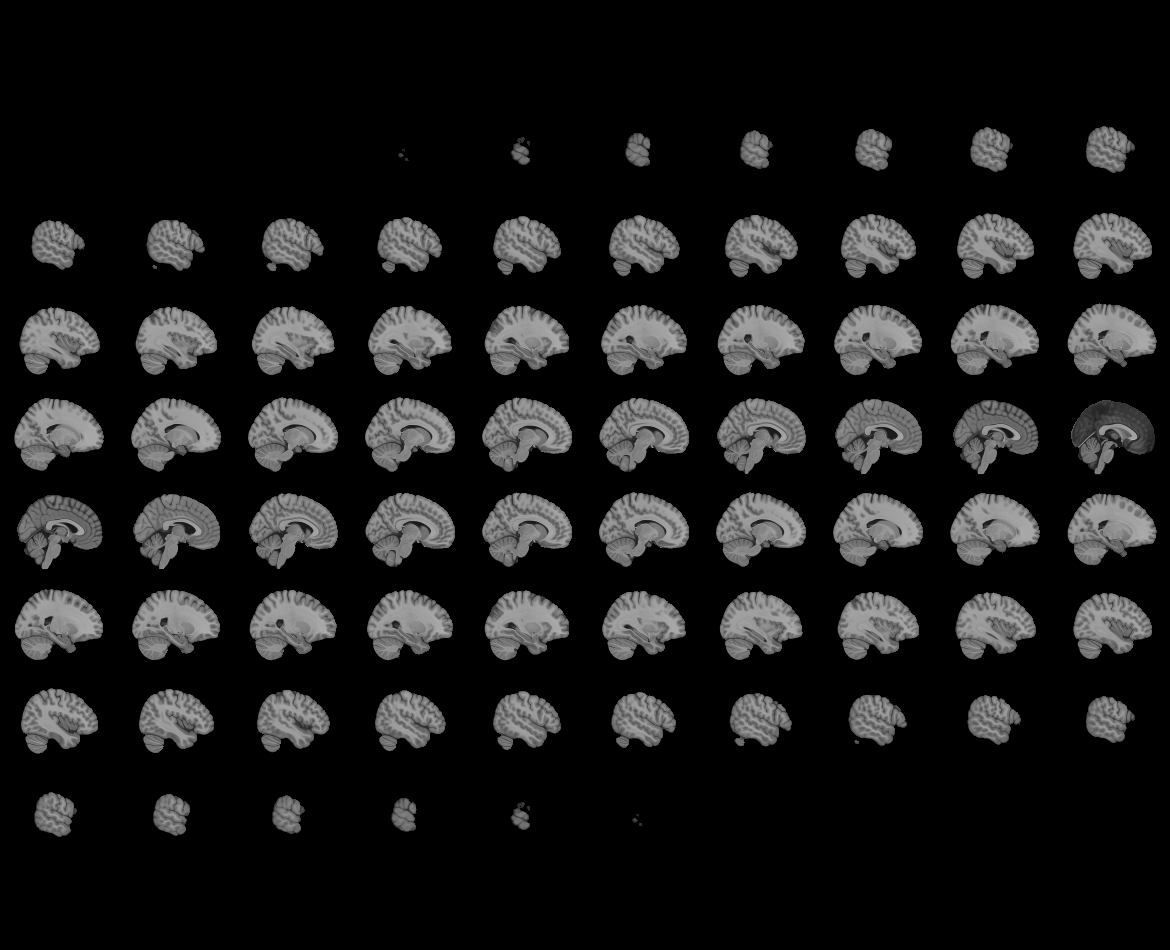
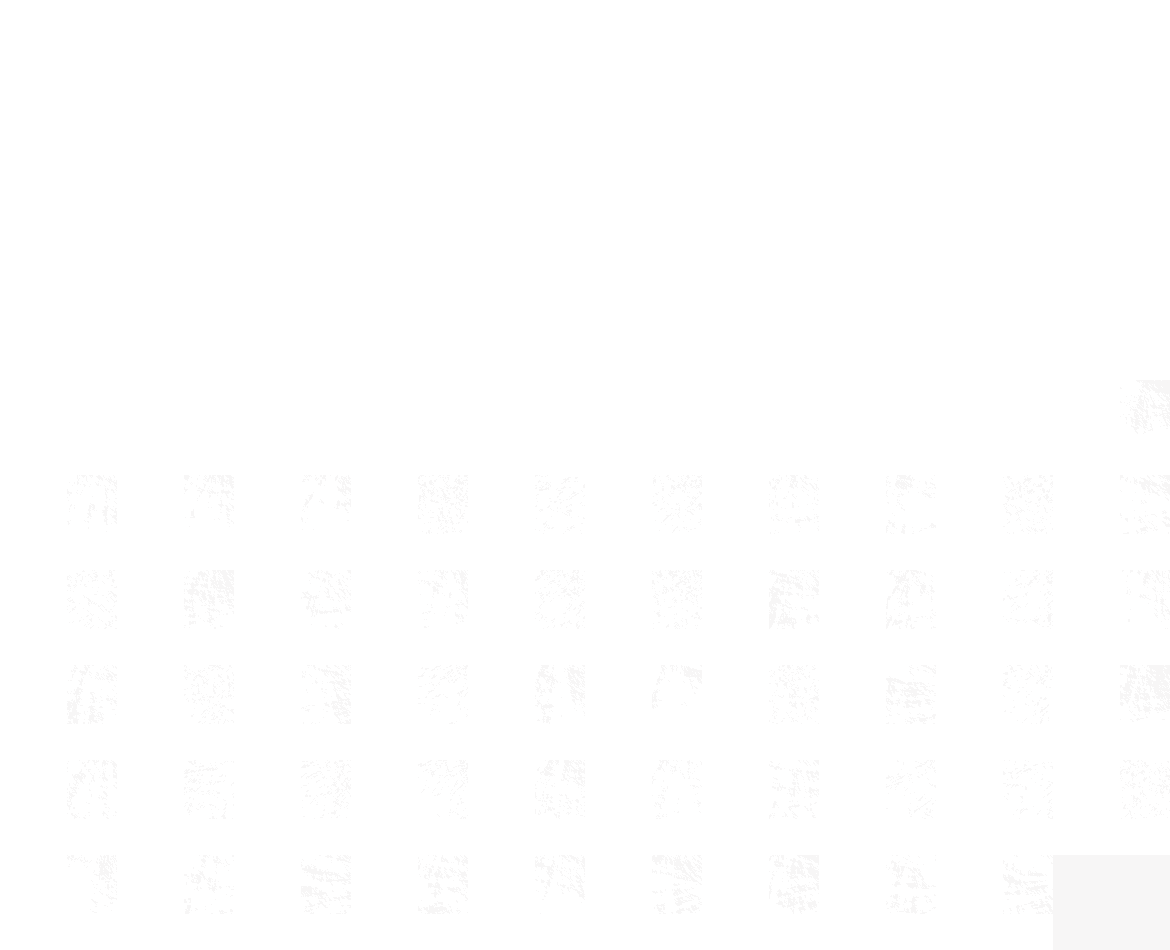

In [20]:
image = load_img(output_dir)
view_img(image)

In [5]:
# def compute_suvr(registered_img, atlas_img):
#     masker = NiftiLabelsMasker(labels_img=atlas_img, standardize=True, strategy='sum')
#     masked_image = masker.fit_transform(registered_img)
#     global_suv = np.sum(masked_image)
#     print(f'Global SUV: {global_suv}')
#     suvrs = {masker.region_names_[region_id]: region_value/global_suv for region_id, region_value in zip(masker.region_names_, masked_image)}
#     return suvrs

Loaded MNI template from data\fdg_pet\PET.nii


C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



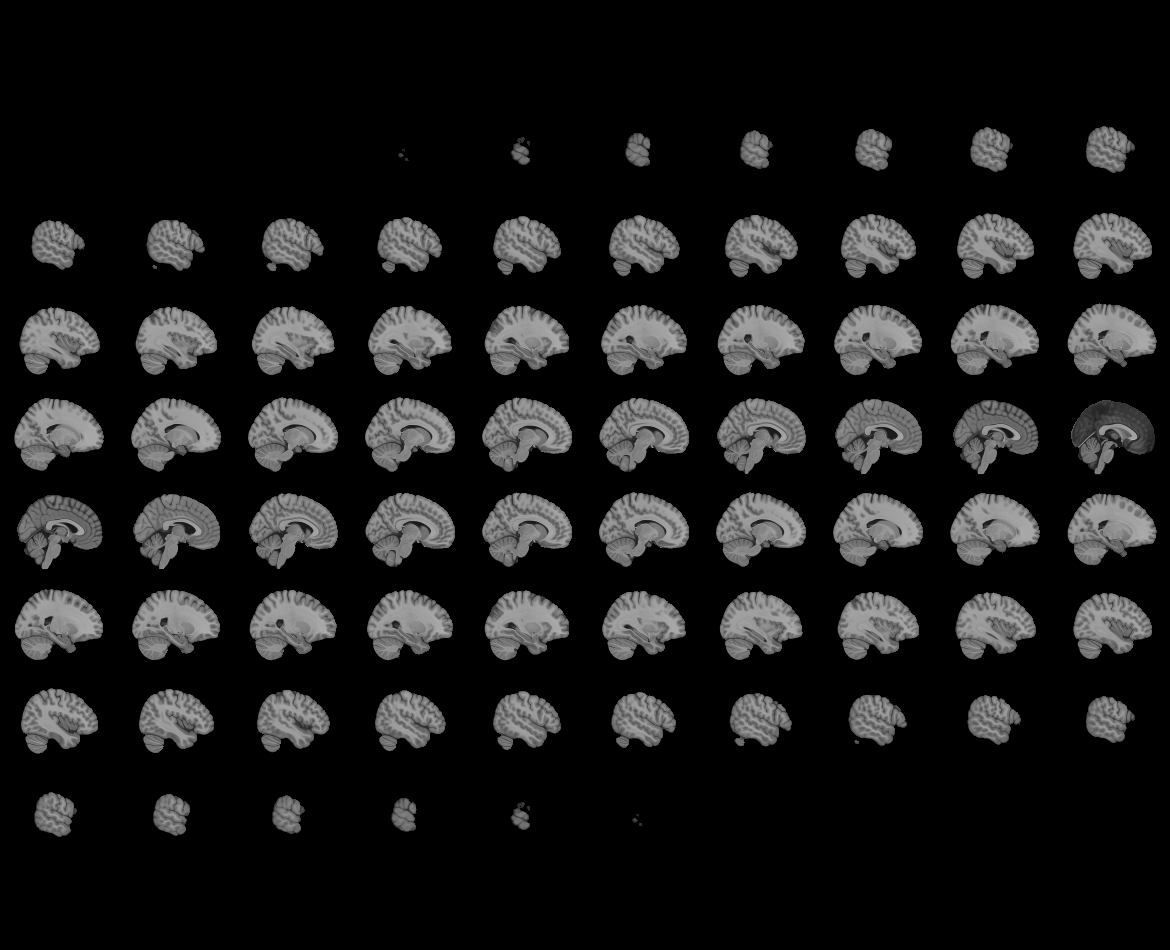
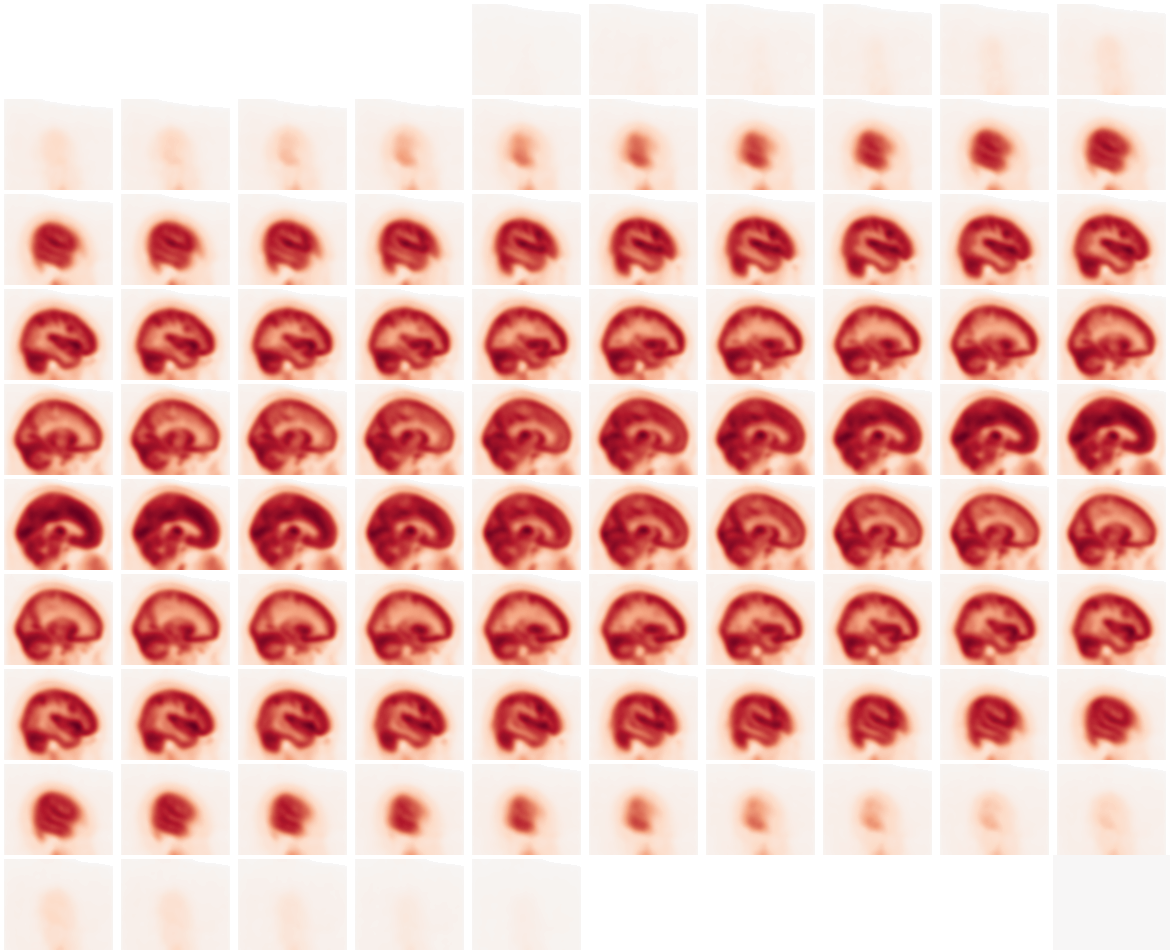

In [8]:
registration_image_path = os.path.join('data', 'fdg_pet', 'PET.nii')
registration_image = load_img(registration_image_path)
print(f'Loaded MNI template from {registration_image_path}')
view_img(registration_image)

In [7]:
aal = fetch_atlas_aal(version='3v2')
atlas_img = load_img(aal.maps)
print(f'Loaded AAL atlas from {aal.maps}')

registered_img = register_image_to_template(image, registration_image)
roi_suvrs = compute_suvr(registered_img, atlas_img)
for name, suv in roi_suvrs.items():
    print(f"  {name}: {suv}")
print(f'Minimum SUVr: {min(roi_suvrs.values())}, Maximum SUVr: {max(roi_suvrs.values())}')

[fetch_atlas_aal] Dataset found in C:\Users\Dhruv Khanna\nilearn_data\aal_3v2

Loaded AAL atlas from C:\Users\Dhruv Khanna\nilearn_data\aal_3v2\AAL3\AAL3v1.nii


C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\preprocess_nifti.py:21: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = resample_to_img(img, mni_img)
C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\preprocess_nifti.py:21: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = resample_to_img(img, mni_img)
C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\preprocess_nifti.py:21: UserWarning: Casting data from int16 to float32
  registered_img = resample_to_img(img, mni_img)


  0: 0.0
  1: 0.04050396755337715
  2: 0.0
  3: 0.15816612541675568
  4: 0.0
  5: 0.1384507715702057
  6: 0.0
  7: 0.08849743008613586
  8: 0.0
  9: 0.10457302629947662
  10: 0.0
  11: 0.0
  12: 0.0
  13: 0.01726551540195942
  14: 0.004806346260011196
  15: 0.02881474606692791
  16: 0.0
  17: 0.0
  18: 0.04031731188297272
  19: 0.16854876279830933
  20: 0.0
  21: 0.0
  22: 0.0
  23: 0.0
  24: 0.0
  25: 0.0
  26: 0.0
  27: 0.0
  28: 0.0
  29: 0.0
  30: 0.0
  31: 0.0
  32: 0.0
  33: 0.008096126839518547
  34: 0.023751750588417053
  37: 0.11455903202295303
  38: 0.0
  39: 0.0
  40: 0.0
  41: 0.0
  42: 0.0
  43: 0.0
  44: 0.0
  45: 0.0
  46: 0.0
  47: 0.0
  48: 0.0
  49: 0.0
  50: 0.0
  51: 0.0
  52: 0.0
  53: 0.0
  54: 0.0
  55: 0.0
  56: 0.0
  57: 0.0
  58: 0.0
  59: 0.0
  60: 0.0
  61: 0.0005599626456387341
  62: 0.0
  63: 0.0
  64: 0.0
  65: 0.0
  66: 0.0
  67: 0.0
  68: 0.0
  69: 0.0
  70: 0.0
  71: 0.0
  72: 0.0
  73: 0.0
  74: 0.0
  75: 0.01784881018102169
  76: 0.0
  77: 0.00650956

C:\Users\Dhruv Khanna\Documents\Coding stuff\ADML\.venv\Lib\site-packages\joblib\memory.py:326: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  return self.func(*args, **kwargs)
